In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%ls

sample_data/


In [3]:
%cd "/gdrive/MyDrive/Hackaton_2023/"

/gdrive/MyDrive/Hackaton_2023


In [4]:
#!wget -r -N -c -np "https://physionet.org/files/challenge-2019/1.0.0/"

You can mount an entire bucket, or a path location within that bucket.
The local path to mount it must exist.

In [5]:
import os

# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [6]:
'''
dataset_path = "physionet.org/files/challenge-2019/1.0.0/training/training_setA/"
aux = pd.read_csv(dataset_path + "p000001.psv", sep= "|")

dataset_columns = list(aux.columns)
dataset_columns = ['patient_id'] + dataset_columns


data = pd.DataFrame(columns=dataset_columns)

contenido = os.listdir(dataset_path)
print(dataset_columns)

cont = 0
for psv in contenido:
  if psv.endswith('.psv'):
    aux = pd.read_csv(dataset_path + psv, sep= "|")
    aux['patient_id'] = cont

    data = pd.concat([data, aux])
    cont += 1

print(len(contenido))
print(contenido)

'''

'\ndataset_path = "physionet.org/files/challenge-2019/1.0.0/training/training_setA/"\naux = pd.read_csv(dataset_path + "p000001.psv", sep= "|")\n\ndataset_columns = list(aux.columns)\ndataset_columns = [\'patient_id\'] + dataset_columns\n\n\ndata = pd.DataFrame(columns=dataset_columns)\n\ncontenido = os.listdir(dataset_path)\nprint(dataset_columns)\n\ncont = 0\nfor psv in contenido:\n  if psv.endswith(\'.psv\'):\n    aux = pd.read_csv(dataset_path + psv, sep= "|")\n    aux[\'patient_id\'] = cont\n\n    data = pd.concat([data, aux])\n    cont += 1\n\nprint(len(contenido))\nprint(contenido)\n\n'

In [7]:
data

#aux

NameError: ignored

In [ ]:
data.to_csv('sep_A.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76857 entries, 0 to 41
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        76857 non-null  object 
 1   HR                71005 non-null  float64
 2   O2Sat             67696 non-null  float64
 3   Temp              26112 non-null  float64
 4   SBP               66166 non-null  float64
 5   MAP               69141 non-null  float64
 6   DBP               41227 non-null  float64
 7   Resp              69457 non-null  float64
 8   EtCO2             0 non-null      float64
 9   BaseExcess        8098 non-null   float64
 10  HCO3              6262 non-null   float64
 11  FiO2              11162 non-null  float64
 12  pH                8876 non-null   float64
 13  PaCO2             6826 non-null   float64
 14  SaO2              3892 non-null   float64
 15  AST               1259 non-null   float64
 16  BUN               6348 non-null   float64
 

In [ ]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
patient_id,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HR,NaN,97.0,89.0,90.0,103.0,110.0,108.0,106.0,104.0,102.0,104.0,NaN,102.0,108.0,106.0
O2Sat,NaN,95.0,99.0,95.0,88.5,91.0,92.0,90.5,95.0,91.0,92.0,NaN,93.0,90.0,90.0
Temp,NaN,NaN,NaN,NaN,NaN,NaN,36.11,NaN,NaN,NaN,37.17,NaN,NaN,NaN,NaN
SBP,NaN,98.0,122.0,NaN,122.0,NaN,123.0,93.0,133.0,134.0,138.0,NaN,129.0,122.0,NaN
MAP,NaN,75.33,86.0,NaN,91.33,NaN,77.0,76.33,88.33,87.33,86.67,NaN,77.0,96.67,NaN
DBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resp,NaN,19.0,22.0,30.0,24.5,22.0,29.0,29.0,26.0,30.0,19.0,NaN,24.0,27.0,25.0
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN


In [ ]:
!ls "physionet.org/files/challenge-2019/1.0.0/training/training_setA"

KeyboardInterrupt: ignored

In [ ]:
data['HospAdmTime'].unique()

array([-3.0000e-02, -9.8600e+01, -5.0000e-02, ..., -1.1085e+02,
       -3.3128e+02, -3.4900e+00])

In [ ]:
len(data['HospAdmTime'].unique())

1048

In [ ]:
data_aux = data.groupby('patient_id').max()

data_aux['ICULOS'].max()

336

In [ ]:
print(data_aux['ICULOS'].min())

print(data_aux['HospAdmTime'].max())
print(data_aux['HospAdmTime'].min())

8
22.04
-3141.55


In [76]:
data = pd.read_csv('sep_A.csv')

len(data.dropna())

0

# Análisis de datos

In [78]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
patient_id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
HR,NaN,97.00,89.00,90.00,103.00,110.00,108.00,106.00,104.00,102.00,104.00,NaN,102.00,108.00,106.00
O2Sat,NaN,95.00,99.00,95.00,88.50,91.00,92.00,90.50,95.00,91.00,92.00,NaN,93.00,90.00,90.00
Temp,NaN,NaN,NaN,NaN,NaN,NaN,36.11,NaN,NaN,NaN,37.17,NaN,NaN,NaN,NaN
SBP,NaN,98.00,122.00,NaN,122.00,NaN,123.00,93.00,133.00,134.00,138.00,NaN,129.00,122.00,NaN
MAP,NaN,75.33,86.00,NaN,91.33,NaN,77.00,76.33,88.33,87.33,86.67,NaN,77.00,96.67,NaN
DBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resp,NaN,19.00,22.00,30.00,24.50,22.00,29.00,29.00,26.00,30.00,19.00,NaN,24.00,27.00,25.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,23.00,NaN,NaN,NaN,NaN


In [79]:
data.isna().sum(axis = 0).sort_values(ascending=False) / len(data) * 100

EtCO2               100.000000
Bilirubin_direct     99.865985
TroponinI            99.846468
Fibrinogen           99.111337
Bilirubin_total      98.654644
Alkalinephos         98.402228
AST                  98.361893
Lactate              96.513005
PTT                  95.135121
Calcium              94.956868
SaO2                 94.936050
Phosphate            94.843671
Platelets            93.435861
Creatinine           93.286233
WBC                  92.460023
Magnesium            92.141249
HCO3                 91.852401
BUN                  91.740505
Chloride             91.521917
PaCO2                91.118571
Hgb                  91.100355
BaseExcess           89.463549
Potassium            89.213735
pH                   88.451280
Hct                  88.330276
Glucose              87.800721
FiO2                 85.476925
Temp                 66.025216
Unit2                50.898422
Unit1                50.898422
DBP                  46.358822
SBP                  13.910249
O2Sat   

In [80]:
data.nunique()

patient_id          1933
HR                   258
O2Sat                 81
Temp                 290
SBP                  520
MAP                  609
DBP                  258
Resp                 146
EtCO2                  0
BaseExcess            75
HCO3                  53
FiO2                  56
pH                    68
PaCO2                116
SaO2                  94
AST                  409
BUN                  147
Alkalinephos         291
Calcium               78
Chloride              61
Creatinine           124
Bilirubin_direct      51
Glucose              457
Lactate              170
Magnesium             44
Phosphate            106
Potassium             76
Bilirubin_total      186
TroponinI             75
Hct                  382
Hgb                  160
PTT                  687
WBC                  358
Fibrinogen           334
Platelets            559
Age                 1643
Gender                 2
Unit1                  2
Unit2                  2
HospAdmTime         1048


In [81]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
patient_id,76857.0,975.166010,557.443469,0.00,487.00,988.00,1452.00,1932.00
HR,71005.0,84.986486,17.200411,23.00,73.00,84.00,96.00,201.00
O2Sat,67696.0,97.233365,2.879442,22.00,96.00,98.00,99.50,100.00
Temp,26112.0,37.010344,0.769771,23.00,36.56,37.00,37.50,41.11
SBP,66166.0,120.695025,21.573008,31.00,105.00,118.00,134.00,272.50
MAP,69141.0,78.730787,14.953564,20.00,68.00,77.00,87.33,297.00
DBP,41227.0,59.859679,12.331899,20.00,51.00,59.00,67.00,269.00
Resp,69457.0,18.787862,5.395740,1.00,15.00,18.00,22.00,59.00
EtCO2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,8098.0,-0.797049,4.339784,-26.00,-3.00,0.00,1.00,36.00


In [82]:
data["SepsisLabel"].value_counts()

0    75089
1     1768
Name: SepsisLabel, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("SepsisLabel", axis=1), data["SepsisLabel"], test_size=0.25, random_state=42)

In [84]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

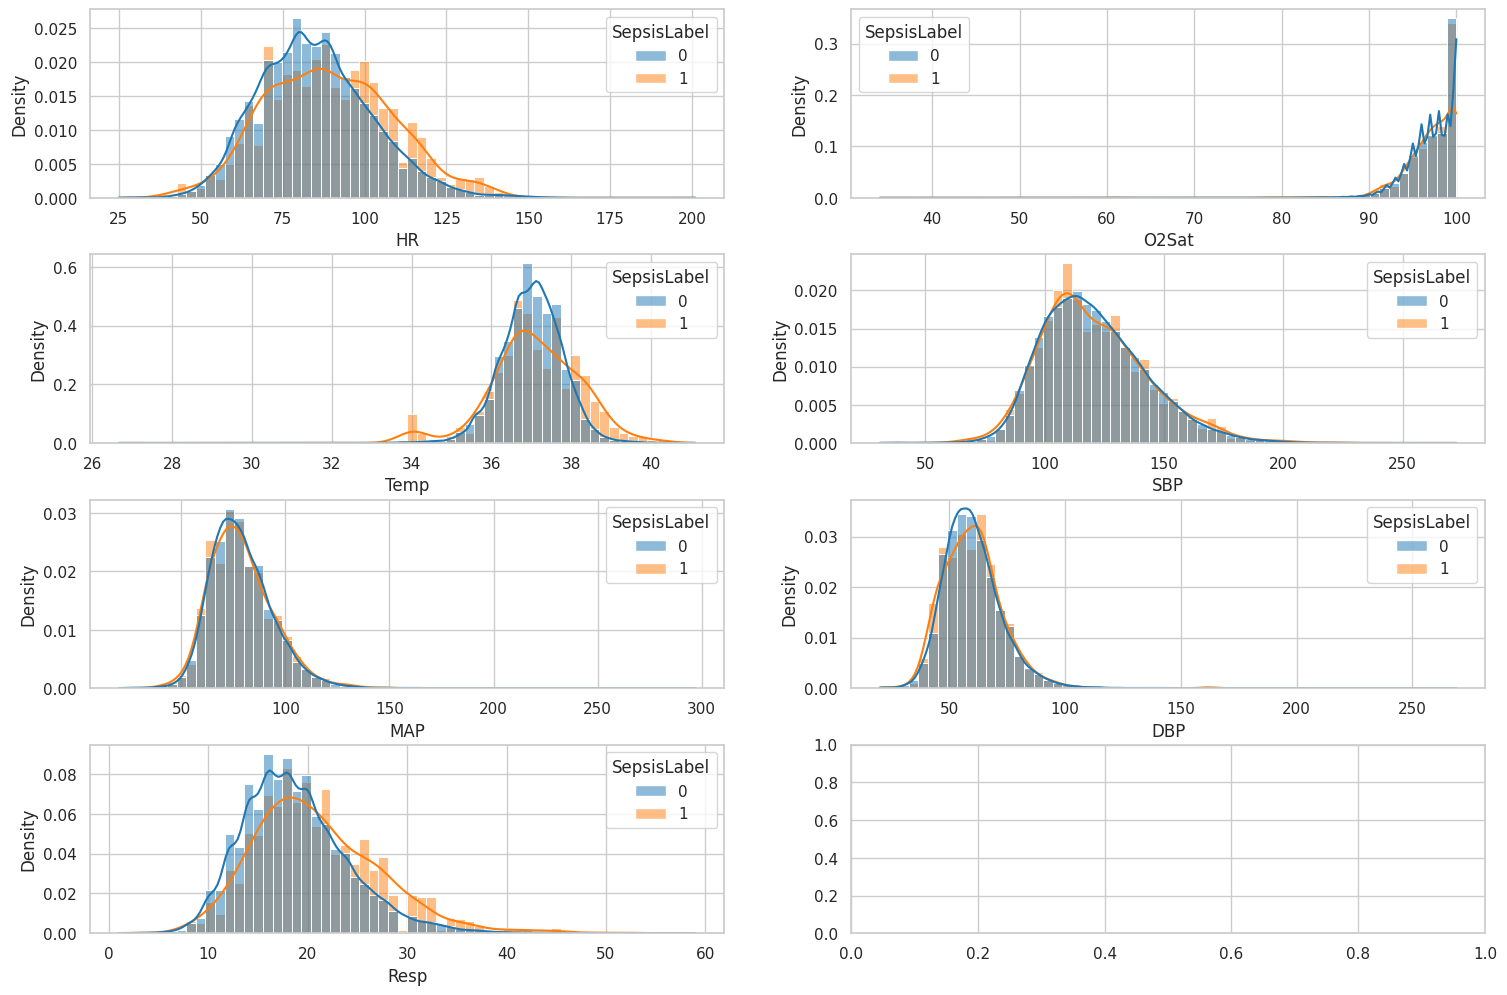

In [85]:
vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

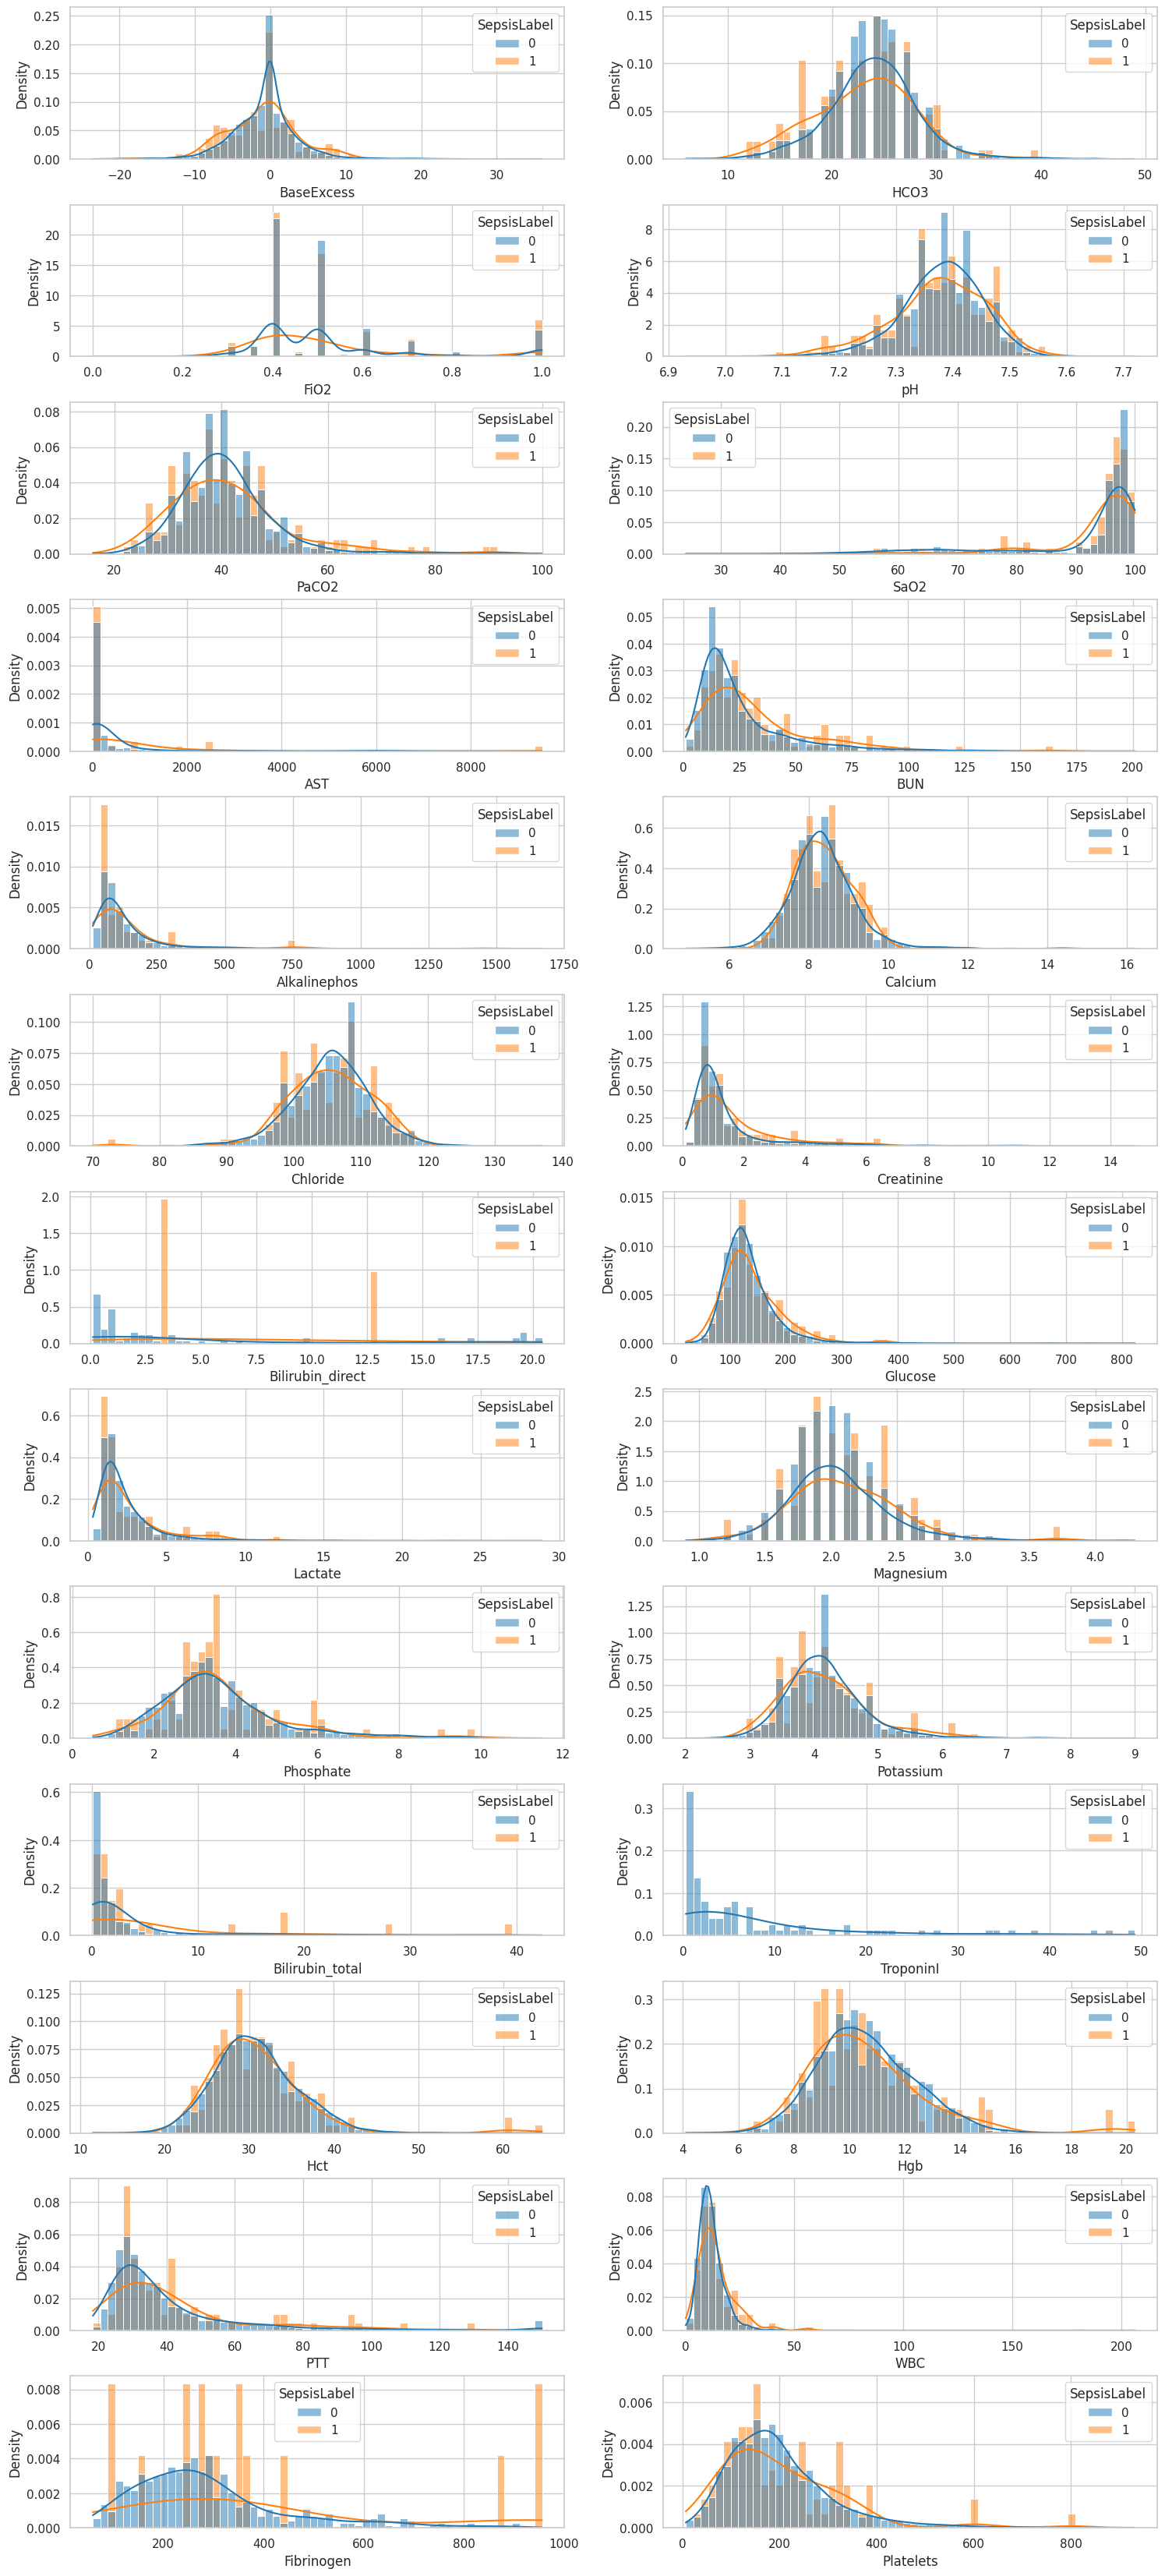

In [86]:
#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

#plt.savefig("lab_values.png", dpi=400)

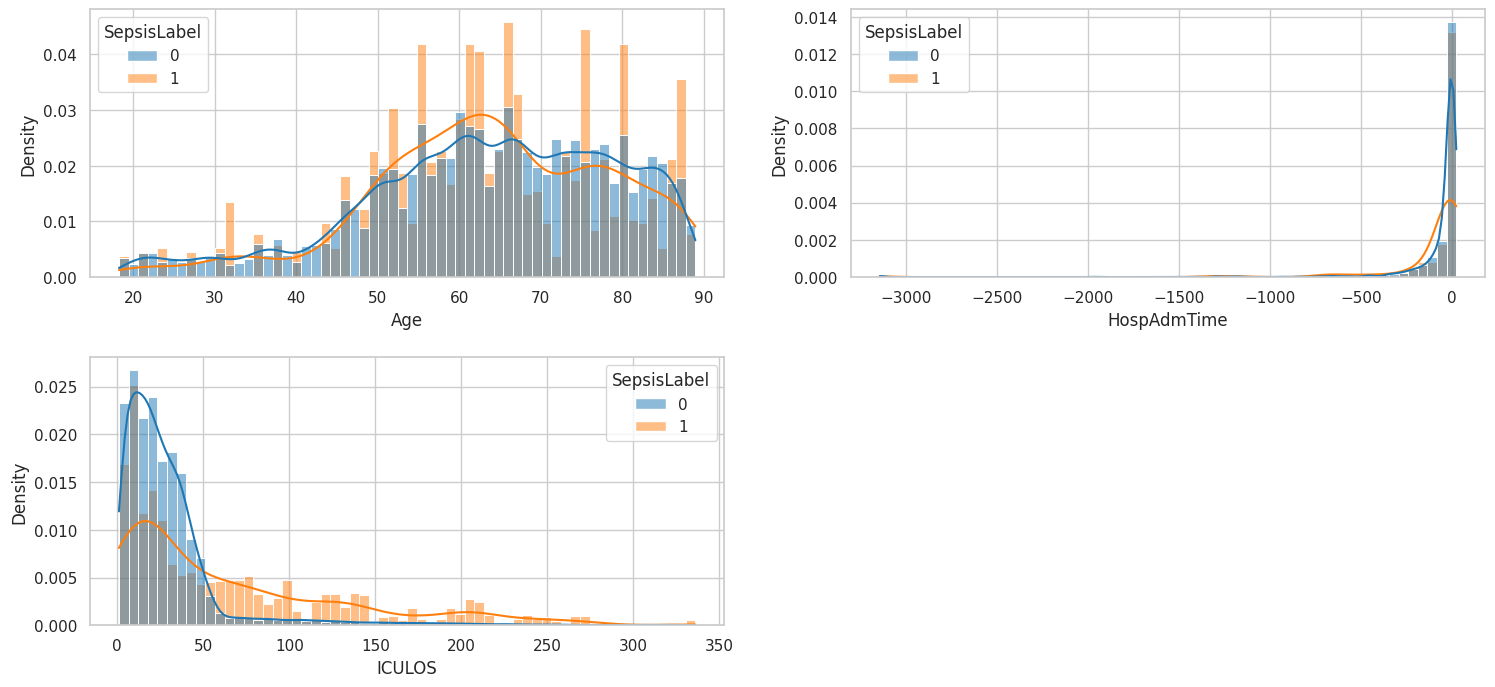

In [87]:
demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

#plt.savefig("demographics.png", dpi=400)

In [88]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"

    sns.countplot(x=gender, hue=y_train, dodge=False)


def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])

    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

<ipython-input-88-73cfaa607895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[gender==0] = "female"


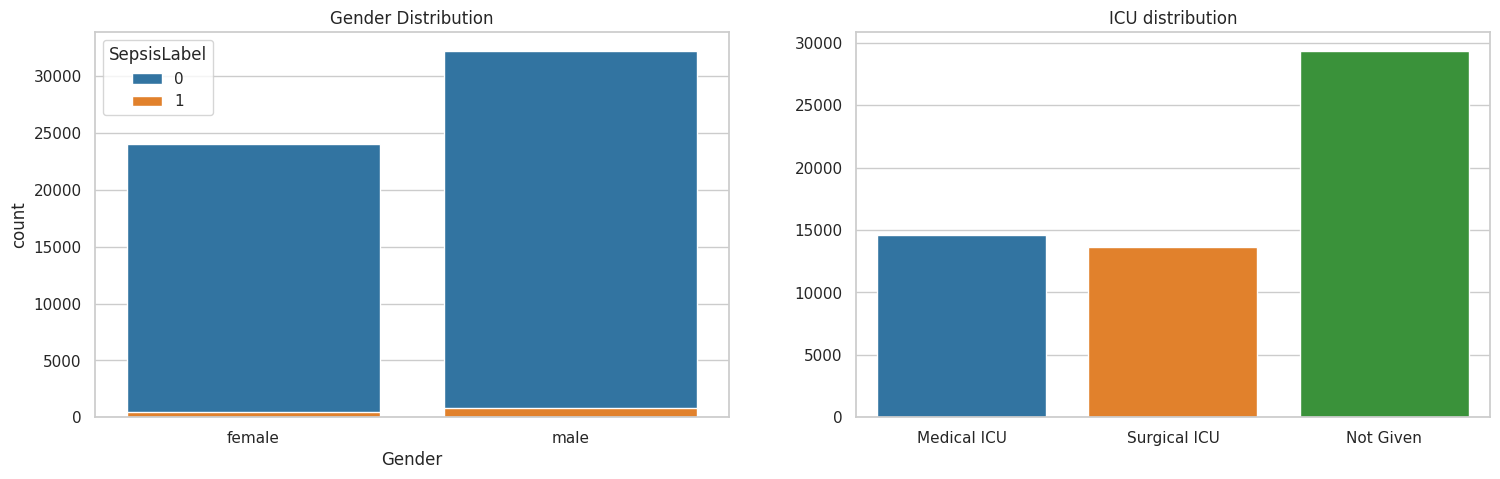

In [89]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

In [90]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}

    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]

    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100

    return shares

IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

<Axes: ylabel='Developed Sepsis (%)'>

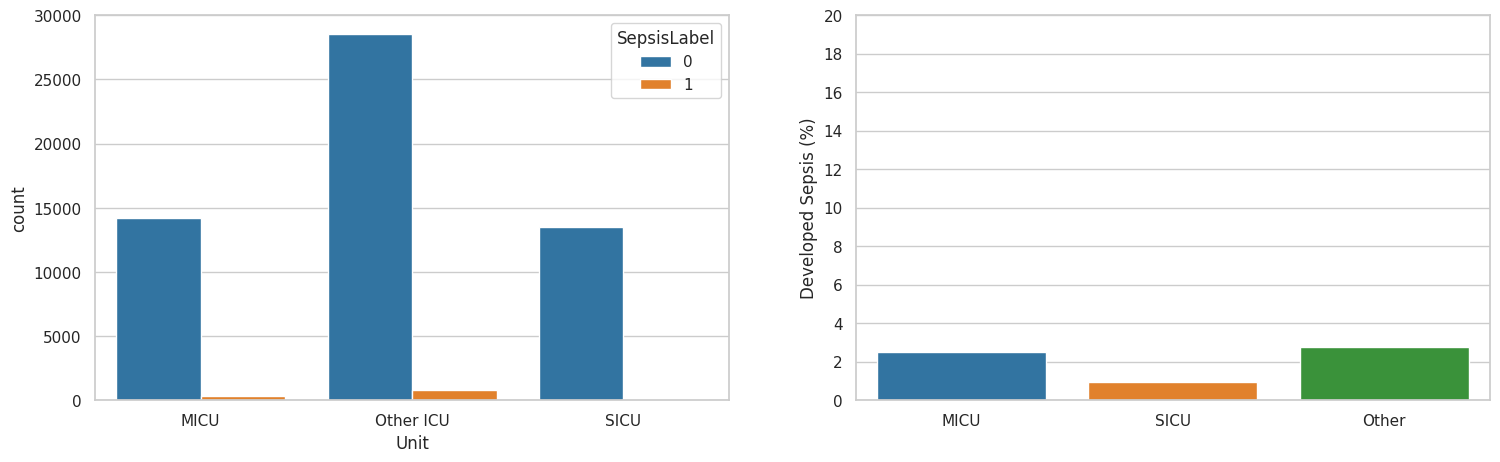

In [91]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

#plt.savefig("add2.png", dpi=400)

<Axes: >

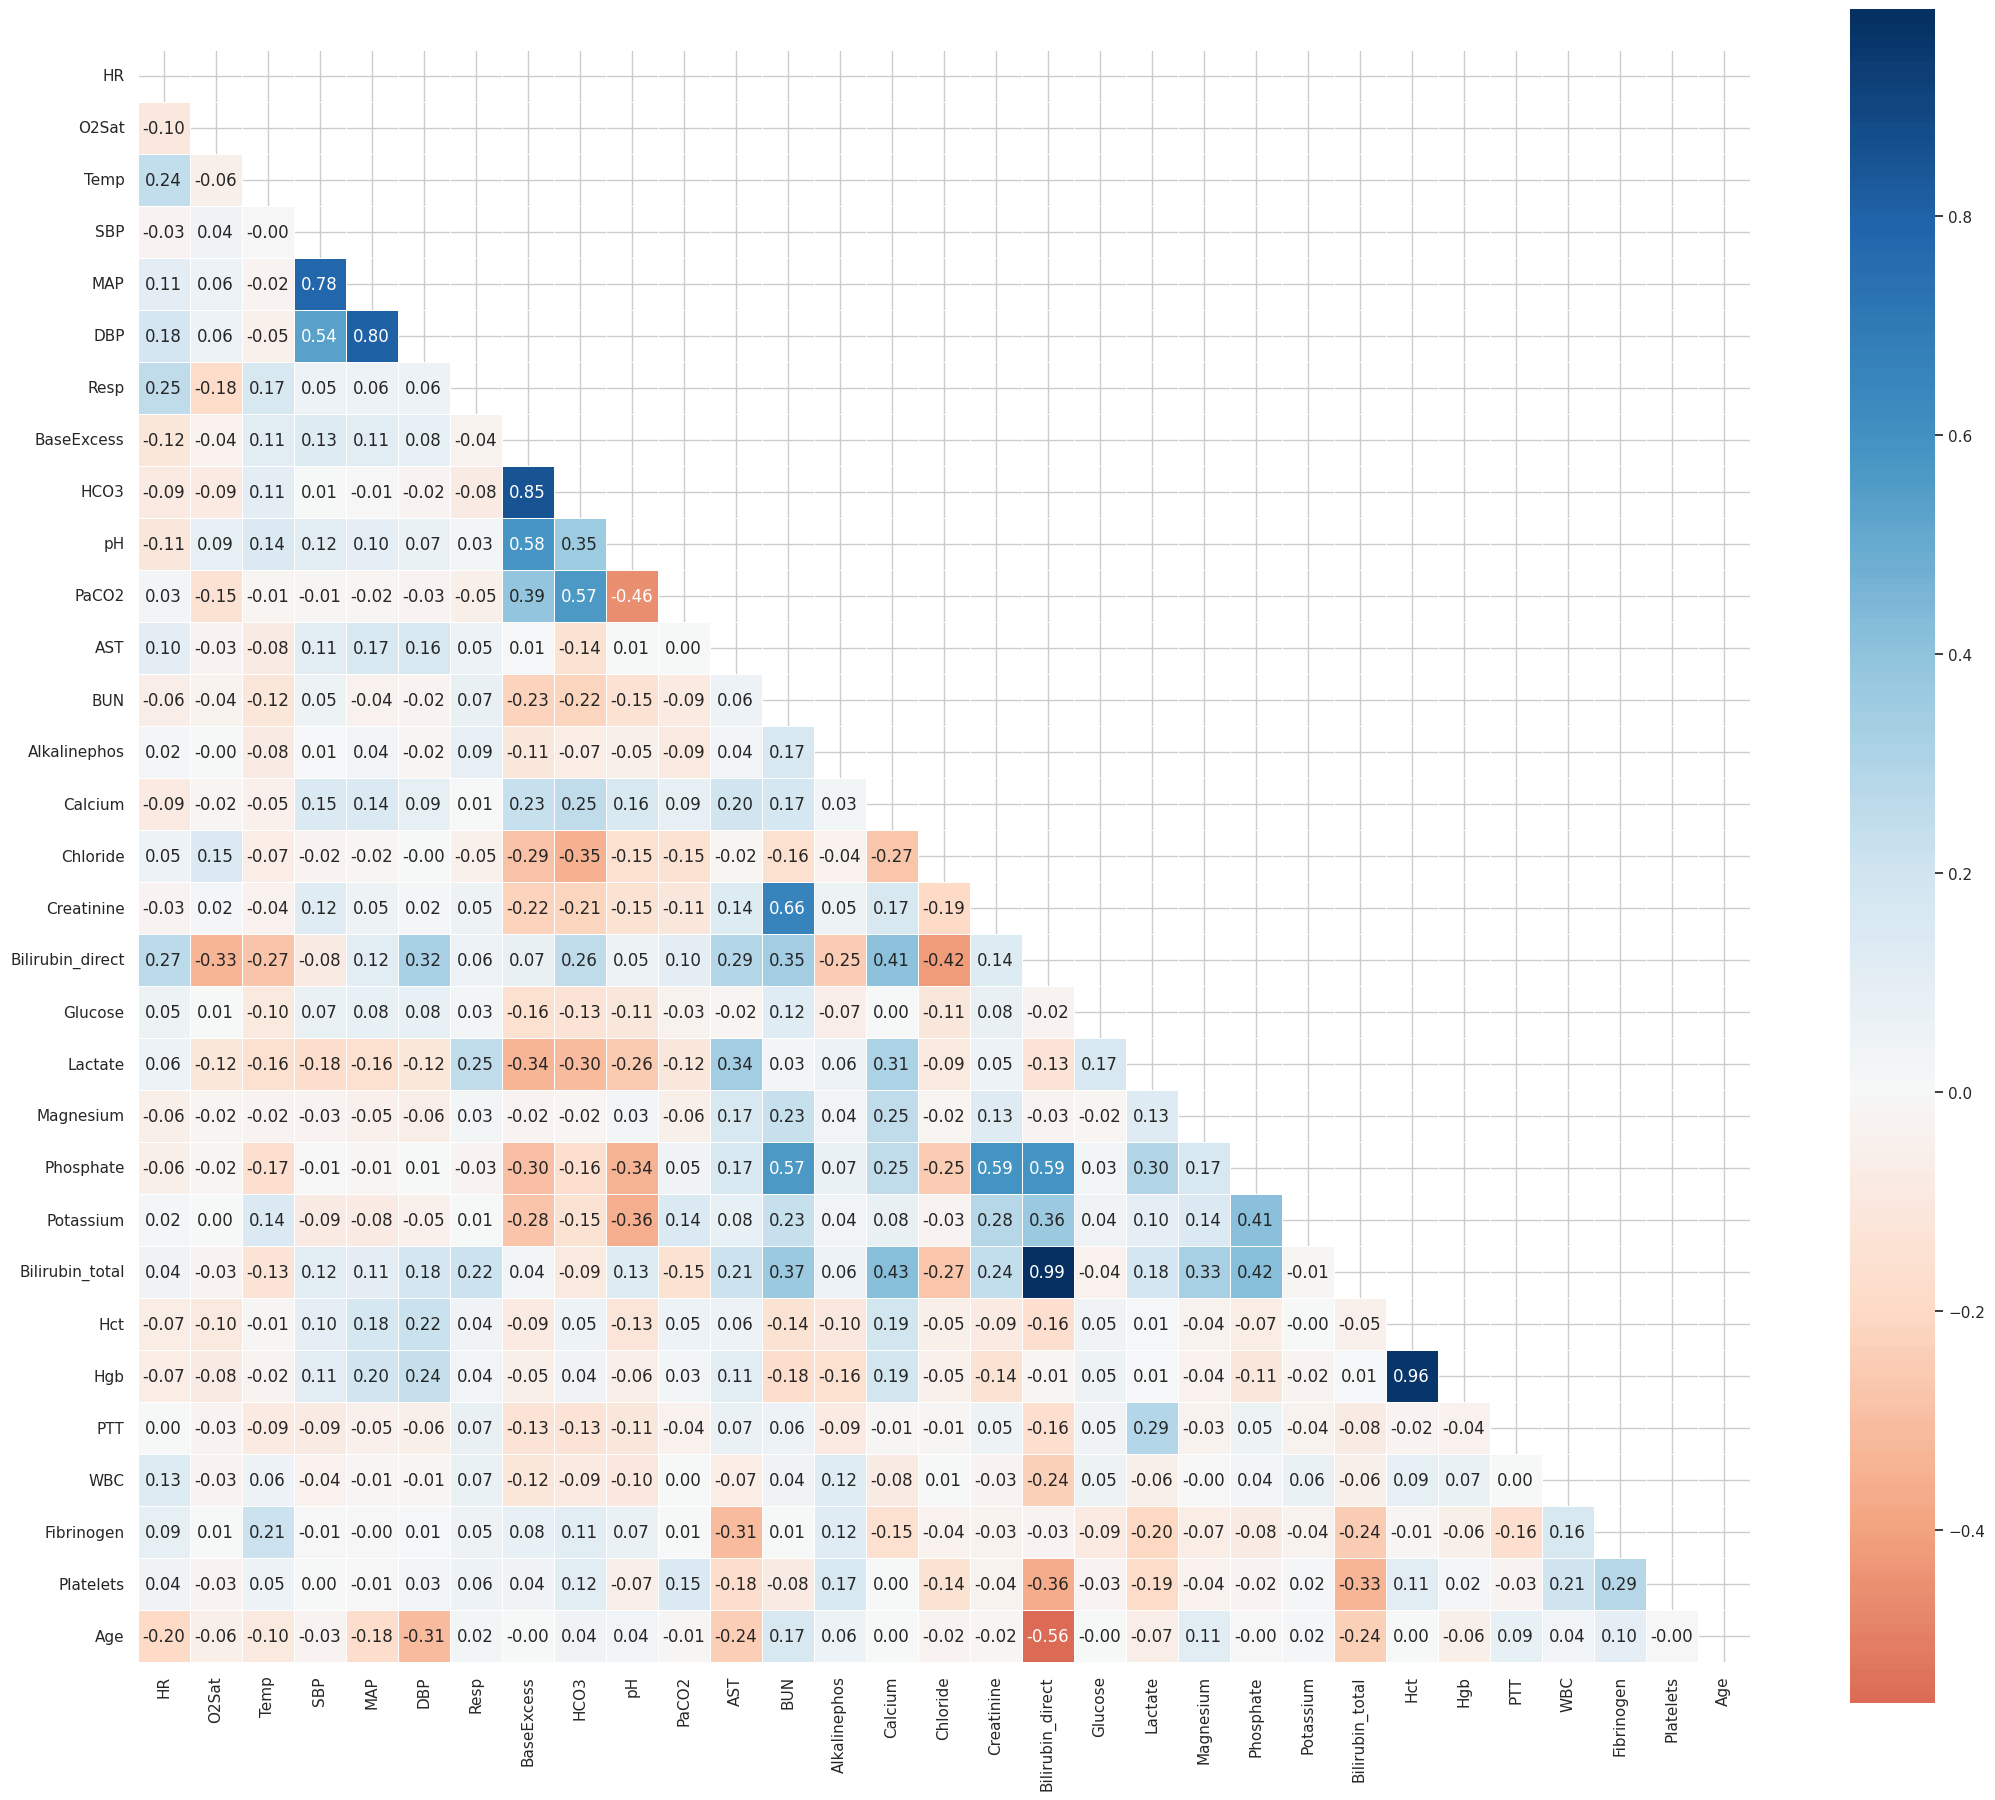

In [92]:
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = X_train[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [93]:
mat_corr["Bilirubin_total"].sort_values(ascending=False)[:3]

Bilirubin_total     1.000000
Bilirubin_direct    0.988953
Calcium             0.426403
Name: Bilirubin_total, dtype: float64

In [94]:
mat_corr["DBP"].sort_values(ascending=False)[:3]

DBP    1.000000
MAP    0.802105
SBP    0.537287
Name: DBP, dtype: float64

In [95]:
mat_corr["SBP"].sort_values(ascending=False)[:3]

SBP    1.000000
MAP    0.780988
DBP    0.537287
Name: SBP, dtype: float64

In [96]:
mat_corr["HCO3"].sort_values(ascending=False)[:4]

HCO3          1.000000
BaseExcess    0.850746
PaCO2         0.569129
pH            0.354861
Name: HCO3, dtype: float64

In [97]:
mat_corr["pH"].sort_values(ascending=False)[:4]

pH            1.000000
BaseExcess    0.578037
HCO3          0.354861
Calcium       0.160477
Name: pH, dtype: float64

In [98]:
mat_corr["PaCO2"].sort_values(ascending=False)[:4]

PaCO2         1.000000
HCO3          0.569129
BaseExcess    0.387711
Platelets     0.150884
Name: PaCO2, dtype: float64

In [99]:
mat_corr["Hgb"].sort_values(ascending=False)[:3]

Hgb    1.000000
Hct    0.963417
DBP    0.238322
Name: Hgb, dtype: float64

In [ ]:
p_dict

In [100]:
columnas_elegidas = ["HR", "O2Sat", "Temp", "MAP", "Resp",
                     "BaseExcess", "HCO3", "pH", "PaCO2",
                     "SaO2", "AST", "BUN", "Alkalinephos",
                     "Calcium", "Chloride", "Creatinine",
                     "Glucose", "Lactate", "Magnesium", "Phosphate",
                     "Potassium", "Bilirubin_total", "Hgb", "PTT", "WBC",
                     "Fibrinogen", "Platelets", "Age", "Gender", "Unit1", "Unit2", "ICULOS"]

print(columnas_elegidas)

['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BaseExcess', 'HCO3', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS']


In [32]:
len(columnas_elegidas)

y_train2 = y_train.loc[X_train["Age"] <= 90]
X_train2 = X_train.loc[X_train["Age"] <= 90]

y_test2 = y_test.loc[X_test["Age"] <= 90]
X_test2 = X_test.loc[X_test["Age"] <= 90]

In [33]:
X_train.columns

Index(['patient_id', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'],
      dtype='object')

In [102]:
X_train2 =X_train[columnas_elegidas]
X_test2 = X_test2[columnas_elegidas]

len(X_train2.dropna())

2

In [35]:
X_train2.head()


,HR,O2Sat,Temp,MAP,Resp,BaseExcess,HCO3,pH,PaCO2,SaO2,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,ICULOS
55829,105.0,98.0,37.56,61.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.78,female,1.0,0.0,31
5382,78.0,98.0,NaN,83.0,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.18,male,NaN,NaN,34
14956,70.5,98.0,NaN,63.5,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,77.62,female,1.0,0.0,12
54657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,53.90,male,1.0,0.0,14
14808,48.0,96.0,NaN,69.0,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,83.30,female,NaN,NaN,25


In [103]:
def discretizateAge(data):
    # teen, youth, adult, senior
    bins = [13, 18, 30, 60, np.inf]
    data = np.digitize(data, bins=bins)
    data = data.reshape(len(data), 1)
    return data

DiscretizateAge = FunctionTransformer(discretizateAge)
DiscretizateAge.fit_transform(X_train["Age"]).shape

(57642, 1)

In [104]:
age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(X_train[["Age"]]).shape

(57642, 1)

In [105]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    ("encoder", OneHotEncoder(sparse=False))
])
units_pipeline.fit_transform(X_train[units]).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(57642, 3)

In [106]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(X_train[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [107]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(X_train[acidbase_features]).shape

(57642, 1)

In [108]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total",
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(X_train[num_features]).shape

(57642, 18)

In [109]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(X_train[["Gender"]])

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [110]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(X_train).shape

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.1s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(57642, 24)

In [111]:
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.fit_transform(X_test)

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.1s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s
[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.0s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [112]:
X_test

y_test

701      0
36372    0
56357    0
44285    0
9555     0
        ..
58862    0
30765    1
562      0
70321    0
19855    0
Name: SepsisLabel, Length: 19215, dtype: int64

In [113]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


model = Sequential(name = 'clasificador')


model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu', input_shape =(np.shape(X_train)[1],1), name = 'Layer1'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer2'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer3'))

#model.add(MaxPooling1D(pool_size = 2, name = 'MaxPooling_Layer1'))
#model.add(Dropout(0.4, name = 'Dropout1'))

#model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu', name = 'Layer4'))
#model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu', name = 'Layer5'))
#model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu', name = 'Layer6'))

model.add(MaxPooling1D(pool_size = 2, name = 'MaxPooling_Layer2'))
#model.add(Dropout(0.4, name = 'Dropout2'))

model.add(Flatten(name = 'Flatten'))

model.add(Dense(25, activation='relu', name = 'DenseLayer'))
model.add(Dense(10, activation='relu', name = 'DenseLayer2'))
model.add(Dense(5, activation='relu', name = 'DenseLayer3'))

model.add(Dense(1, activation='sigmoid', name = 'OutputLayer'))


In [114]:
model.summary()

Model: "clasificador"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv1D)             (None, 22, 64)            256       
                                                                 
 Layer2 (Conv1D)             (None, 20, 64)            12352     
                                                                 
 Layer3 (Conv1D)             (None, 18, 64)            12352     
                                                                 
 MaxPooling_Layer2 (MaxPool  (None, 9, 64)             0         
 ing1D)                                                          
                                                                 
 Flatten (Flatten)           (None, 576)               0         
                                                                 
 DenseLayer (Dense)          (None, 25)                14425     
                                                      

In [115]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [131]:
np.sum(y_train)

1314

In [133]:
hist = model.fit(X_train,
                       y_train,
                       epochs = 30,
                       batch_size = 256,
                      validation_data = (X_test, y_test),
                       )

IndexError: ignored

In [54]:
X_train[0,:]

array([ 1.21865455,  0.25136078,  1.24996477, -1.23801307, -1.89100422,
       -0.03999548, -0.09759001, -0.03487336, -0.00928175, -0.08708132,
       -0.05816849, -0.04328735, -0.03208791, -0.07109378, -0.04174338,
       -0.01794798, -0.04461434,  0.02648635,  0.        ,  4.        ,
        1.        ,  0.        ,  0.        ,  0.        ])

In [125]:
pred = model.predict(X_test)

601/601 [==============================] - 2s 3ms/step


In [126]:
print(pred)

[[0.01947991]
 [0.01843052]
 [0.00805788]
 ...
 [0.0224197 ]
 [0.01691917]
 [0.00817052]]


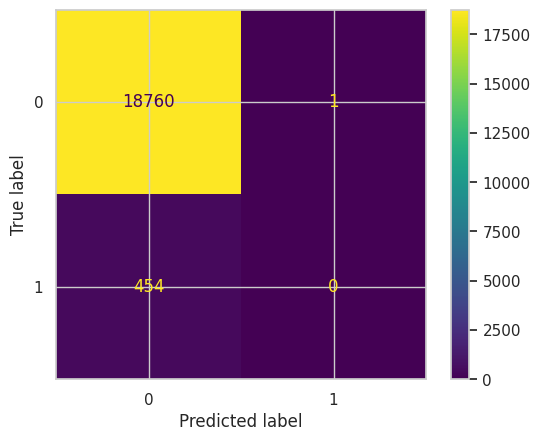

In [130]:
from  sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

predicted = tf.squeeze(pred)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [134]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=150, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
cv_xgboost = cross_validate(xgboost, X_train, y_train, cv=3, scoring="f1", return_train_score=True, verbose=1)
cv_xgboost

{'fit_time': array([5.5645237 , 2.64592695, 0.60725379]),
 'score_time': array([0.17499137, 0.10439253, 0.05724525]),
 'test_score': array([0.2630273 , 0.2673147 , 0.26213592]),
 'train_score': array([0.83187661, 0.81092012, 0.82610913])}

In [ ]:
nn = MLPClassifier(max_iter=50, hidden_layer_sizes=(50,50,50,50), verbose=0, learning_rate="adaptive")
cv_nn = cross_validate(nn, X_train, y_train, cv=3, scoring="f1", return_train_score=True, verbose=1)
cv_nn

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
